In [6]:
import xarray as xr
import cmocean
import matplotlib.pyplot as plt
import cartopy.feature as cpf
import cartopy.crs as ccrs
import numpy as np

In [7]:
ds = xr.open_dataset("/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/robby/erin/ecape/ecape_20070818.nc")

In [8]:
ds

<xarray.Dataset>
Dimensions:    (time: 8, latitude: 14, longitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 2007-08-18 ... 2007-08-18T21:00:00
  * latitude   (latitude) float64 25.0 26.0 27.0 28.0 ... 35.0 36.0 37.0 38.0
  * longitude  (longitude) float64 -105.0 -104.0 -103.0 ... -95.0 -94.0 -93.0
Data variables:
    ecape      (time, latitude, longitude) float64 ...
Attributes:
    description:  ECAPE calculated over the domain using ERA5 data
    units:        J/kg

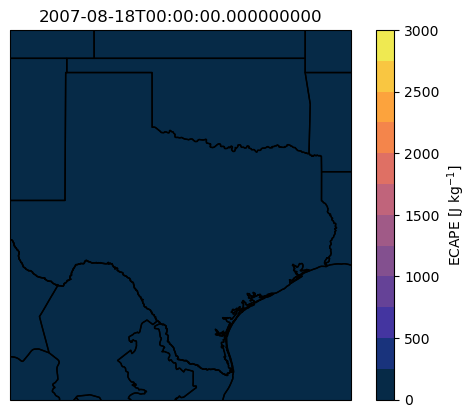

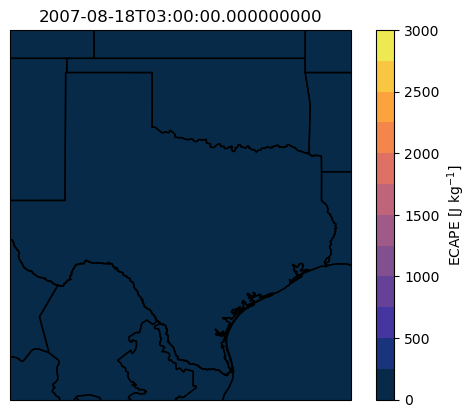

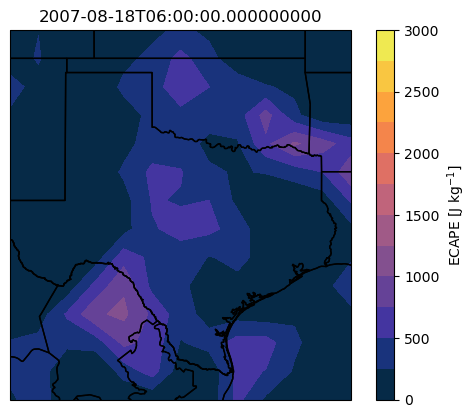

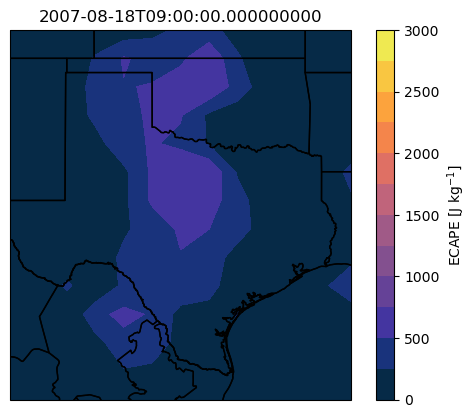

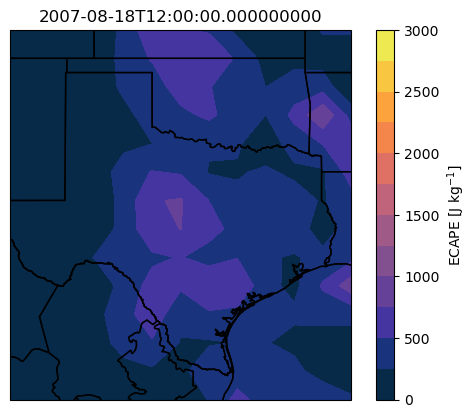

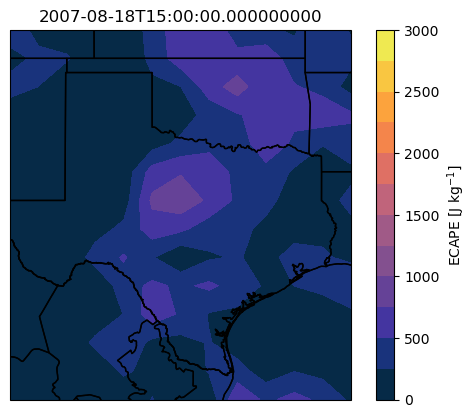

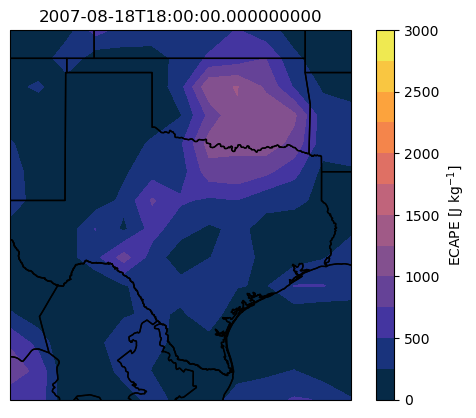

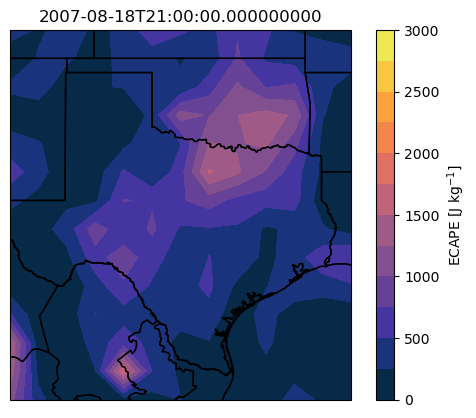

In [9]:
cmap = cmocean.cm.thermal
clevs = np.arange(0,3000.1,250)

for jt in range(ds.time.size):

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    cf = ax.contourf(ds.longitude, ds.latitude, ds.ecape[jt], clevs, cmap=cmap)

    cb = plt.colorbar(cf, ax=ax)
    cb.set_label("ECAPE [J kg$^{-1}$]")

    ax.coastlines()
    ax.add_feature(cpf.BORDERS)
    ax.add_feature(cpf.STATES)

    ax.set_title(f"{ds.time[jt].values}")